In [1]:
#Import dependecies
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
from datetime import datetime as dt
import seaborn as sns

### Extract the relevant data and rename column headers for consistency ###

In [2]:
#Extract data from csvs on carbon metrics from 2020
carbon_df = pd.read_csv('input_data/carbon.csv')

# Rename first column to 'city' for common primary key and county column as well for consistency
carbon_df = carbon_df.rename(columns ={'carbon_city': 'city', 'carbon_county': 'county'})

# Convert date from object to datetime format
carbon_df["carbon_date"] = pd.to_datetime(carbon_df["carbon_date"], format='mixed')

carbon_df.head()
carbon_df

,city,county,carbon_mean,carbon_method,carbon_site,carbon_date
0,Redwood City,San Mateo,0.373913,INSTRUMENTAL - NONDISPERSIVE INFRARED,1001,2020-01-01
1,Redwood City,San Mateo,0.550000,INSTRUMENTAL - NONDISPERSIVE INFRARED,1001,2020-01-02
2,Redwood City,San Mateo,0.673913,INSTRUMENTAL - NONDISPERSIVE INFRARED,1001,2020-01-03
3,Redwood City,San Mateo,0.447826,INSTRUMENTAL - NONDISPERSIVE INFRARED,1001,2020-01-04
4,Redwood City,San Mateo,0.395652,INSTRUMENTAL - NONDISPERSIVE INFRARED,1001,2020-01-05
...,...,...,...,...,...,...
14457,Arden-Arcade,Sacramento,0.300000,INSTRUMENTAL - Gas Filter Correlation Teledyne...,6,2020-12-27
14458,Arden-Arcade,Sacramento,0.283333,INSTRUMENTAL - Gas Filter Correlation Teledyne...,6,2020-12-28
14459,Arden-Arcade,Sacramento,0.520833,INSTRUMENTAL - Gas Filter Correlation Teledyne...,6,2020-12-29
14460,Arden-Arcade,Sacramento,0.387500,INSTRUMENTAL - Gas Filter Correlation Teledyne...,6,2020-12-30


In [3]:
print(carbon_df.dtypes)

city                     object
county                   object
carbon_mean             float64
carbon_method            object
carbon_site               int64
carbon_date      datetime64[ns]
dtype: object


In [4]:
#Extract data from csvs on nitrogen metrics from 2020
nitrogen_df = pd.read_csv('input_data/nitrogen1.csv')

# Rename first column to 'city' for common primary key and county column as well for consistency
nitrogen_df = nitrogen_df.rename(columns ={'nitrogen_city': 'city', 'nitrogen_county': 'county'})

# Convert date from object to datetime format
nitrogen_df["nitrogen_date"] = pd.to_datetime(nitrogen_df["nitrogen_date"], format='mixed')

nitrogen_df.head()
nitrogen_df

,city,county,nitrogen_mean,nitrogen_method,nitrogen_site,nitrogen_date
0,Redwood City,San Mateo,7.382609,INSTRUMENTAL - CHEMILUMINESCENCE,1001,2020-01-01
1,Redwood City,San Mateo,14.572727,INSTRUMENTAL - CHEMILUMINESCENCE,1001,2020-01-02
2,Redwood City,San Mateo,17.608696,INSTRUMENTAL - CHEMILUMINESCENCE,1001,2020-01-03
3,Redwood City,San Mateo,13.047826,INSTRUMENTAL - CHEMILUMINESCENCE,1001,2020-01-04
4,Redwood City,San Mateo,10.252174,INSTRUMENTAL - CHEMILUMINESCENCE,1001,2020-01-05
...,...,...,...,...,...,...
18887,Sacramento,Sacramento,5.800000,Instrumental - Chemiluminescence Teledyne API ...,10,2020-04-23
18888,Sacramento,Sacramento,6.060870,Instrumental - Chemiluminescence Teledyne API ...,10,2020-04-24
18889,Sacramento,Sacramento,6.052174,Instrumental - Chemiluminescence Teledyne API ...,10,2020-04-25
18890,Sacramento,Sacramento,2.908696,Instrumental - Chemiluminescence Teledyne API ...,10,2020-04-26


In [5]:
#Extract data from csvs on ozone metrics from 2020
ozone_df = pd.read_csv('input_data/ozone1.csv')

# Rename first column to 'city' for common primary key and county column as well for consistency
ozone_df = ozone_df.rename(columns ={'ozone_city': 'city', 'ozone_county': 'county'})

# Convert date from object to datetime format
ozone_df["ozone_date"] = pd.to_datetime(ozone_df["ozone_date"], format='mixed')

ozone_df.head()

,city,county,ozone_mean,ozone_method,ozone_site,ozone_date
0,San Francisco,San Francisco,0.019130,INSTRUMENTAL - ULTRA VIOLET,5,2020-01-01
1,San Francisco,San Francisco,0.009000,INSTRUMENTAL - ULTRA VIOLET,5,2020-01-02
2,San Francisco,San Francisco,0.009217,INSTRUMENTAL - ULTRA VIOLET,5,2020-01-03
3,San Francisco,San Francisco,0.023087,INSTRUMENTAL - ULTRA VIOLET,5,2020-01-04
4,San Francisco,San Francisco,0.025783,INSTRUMENTAL - ULTRA VIOLET,5,2020-01-05


In [6]:
#Extract data from csvs on particulate matter 10 (with a diameter of 10 microns or less ) metrics from 2020
pm10_df = pd.read_csv('input_data/pm10_1.csv')

# Rename first column to 'city' for common primary key and county column as well for consistency
pm10_df = pm10_df.rename(columns ={'10_city': 'city', '10_county': 'county', '10_mean': 'pm10_mean', '10_method': 'pm10_method'})

# Convert date from object to datetime format
pm10_df["pm_10_date"] = pd.to_datetime(pm10_df["pm_10_date"], format='mixed')

pm10_df.head()

,city,county,pm10_mean,pm10_method,10_site,pm_10_date
0,San Francisco,San Francisco,17.0,HI-VOL SA/GMW-1200 - GRAVIMETRIC,5,2020-02-09
1,San Francisco,San Francisco,14.0,HI-VOL SA/GMW-1200 - GRAVIMETRIC,5,2020-01-04
2,San Francisco,San Francisco,9.0,HI-VOL SA/GMW-1200 - GRAVIMETRIC,5,2020-01-16
3,San Francisco,San Francisco,20.0,HI-VOL SA/GMW-1200 - GRAVIMETRIC,5,2020-01-28
4,San Francisco,San Francisco,29.0,HI-VOL SA/GMW-1200 - GRAVIMETRIC,5,2020-02-21


In [7]:
#Extract data from csvs on particulate matter 25 (with a diameter of 25 microns or less) metrics from 2020
pm25_df = pd.read_csv('input_data/pm25_1.csv')

# Rename first column to 'city' for common primary key and county column as well for consistency
pm25_df = pm25_df.rename(columns ={'25_city': 'city', '25_county': 'county', '25_mean': 'pm25_mean', '25_method': 'pm25_method'})

# Convert date from object to datetime format
pm25_df["pm_25_date"] = pd.to_datetime(pm25_df["pm_25_date"], format='mixed')

pm25_df.head()

,city,county,pm25_mean,pm25_method,25_site,pm_25_date
0,Roseville,Placer,23.0,R & P Model 2000 PM-2.5 Air Sampler w/VSCC - G...,6,2020-01-04
1,Roseville,Placer,4.8,R & P Model 2000 PM-2.5 Air Sampler w/VSCC - G...,6,2020-01-16
2,Roseville,Placer,5.9,R & P Model 2000 PM-2.5 Air Sampler w/VSCC - G...,6,2020-01-28
3,Roseville,Placer,2.2,R & P Model 2000 PM-2.5 Air Sampler w/VSCC - G...,6,2020-02-09
4,Roseville,Placer,12.6,R & P Model 2000 PM-2.5 Air Sampler w/VSCC - G...,6,2020-02-21


In [8]:
#Extract data from csvs on sulfur metrics from 2020
sulfur_df = pd.read_csv('input_data/sulfur1.csv')

# Rename first column to 'city' for common primary key and county column as well for consistency
sulfur_df = sulfur_df.rename(columns ={'sulfur_city': 'city', 'sulfur_county': 'county'})

# Convert date from object to datetime format
sulfur_df["sulfur_date"] = pd.to_datetime(sulfur_df["sulfur_date"], format='mixed')

sulfur_df.head()

,city,county,sulfur_mean,sulfur_method,sulfur_site,sulfur_date
0,Vallejo,Solano,0.968182,INSTRUMENTAL - PULSED FLUORESCENT,4,2020-01-01
1,Vallejo,Solano,1.031818,INSTRUMENTAL - PULSED FLUORESCENT,4,2020-01-02
2,Vallejo,Solano,0.936364,INSTRUMENTAL - PULSED FLUORESCENT,4,2020-01-03
3,Vallejo,Solano,0.886364,INSTRUMENTAL - PULSED FLUORESCENT,4,2020-01-04
4,Vallejo,Solano,0.800000,INSTRUMENTAL - PULSED FLUORESCENT,4,2020-01-05


### Calculate the MAX AQI for all pollutant types by month ###

In [9]:
# Calculate the max AQI for all pollutant types by month
#Carbon
carbon_jan = carbon_df[(carbon_df['carbon_date'] >= '2020-01-01') & (carbon_df['carbon_date'] <= '2020-01-31')]
max_carbon_jan = carbon_jan['carbon_mean'].max()
print(max_carbon_jan)

1.352632


In [10]:
# Create an empty DataFrame to store the results for max carbon by month
max_carbon_by_month_by_city = []

# Get the list of unique cities
cities = carbon_df['city'].unique()

# Loop through each city
for city in cities:
    # Loop through each month in 2020
    for month in range(1, 13):
        start_date = f'2020-{month:02d}-01'
        end_date = pd.to_datetime(start_date).replace(day=1) + pd.DateOffset(months=1) - pd.DateOffset(days=1)
        
        # Filter data for the specified city and month
        carbon_month_city = carbon_df[(carbon_df['city'] == city) &
                                      (carbon_df['carbon_date'] >= start_date) &
                                      (carbon_df['carbon_date'] <= end_date)]
        
        # Calculate the max AQI for carbon
        max_carbon = carbon_month_city['carbon_mean'].max()
        
        # Append the result to the list
        max_carbon_by_month_by_city.append({'city': city, 'month': start_date, 'carbon max': max_carbon})

#Convert the list to a DataFrame
max_carbon_by_month_by_city = pd.DataFrame(max_carbon_by_month_by_city)

# Display the max AQI for carbon for each month in 2020
max_carbon_by_month_by_city

# Sort alphabetically by city
carbon_sort_df = max_carbon_by_month_by_city.sort_values(by= 'city')

# Export csv with monthly carbon levels by city
carbon_sort_df.to_csv('output_data/carbon_monthly.csv')
carbon_sort_df

,city,month,carbon max
203,Arden-Arcade,2020-12-01,0.835792
202,Arden-Arcade,2020-11-01,0.970833
192,Arden-Arcade,2020-01-01,0.712500
193,Arden-Arcade,2020-02-01,0.800000
195,Arden-Arcade,2020-04-01,0.245833
...,...,...,...
47,Vallejo,2020-12-01,1.022727
36,Vallejo,2020-01-01,0.865217
46,Vallejo,2020-11-01,1.020833
39,Vallejo,2020-04-01,0.400000


In [11]:
# Create an empty DataFrame to store the results for max nitrogen by month
max_nitrogen_by_month_by_city = []

# Get the list of unique cities
cities = nitrogen_df['city'].unique()

# Loop through each city
for city in cities:
    # Loop through each month in 2020
    for month in range(1, 13):
        start_date = f'2020-{month:02d}-01'
        end_date = pd.to_datetime(start_date).replace(day=1) + pd.DateOffset(months=1) - pd.DateOffset(days=1)

        # Filter data for the specified city and month
        nitrogen_month_city = nitrogen_df[(nitrogen_df['city'] == city) &
                                      (nitrogen_df['nitrogen_date'] >= start_date) &
                                      (nitrogen_df['nitrogen_date'] <= end_date)]
        
        # Filter data for the specified month
        nitrogen_month = nitrogen_df[(nitrogen_df['nitrogen_date'] >= start_date) & (nitrogen_df['nitrogen_date'] <= end_date)]
        
        # Calculate the max AQI
        max_nitrogen = nitrogen_month_city['nitrogen_mean'].max()
        
        # Append the result to the list
        max_nitrogen_by_month_by_city.append({'city': city,'month': start_date, 'nitrogen max': max_nitrogen})

#Convert the list to a DataFrame
max_nitrogen_by_month_by_city = pd.DataFrame(max_nitrogen_by_month_by_city)

# Display the max AQI for each month in 2020
max_nitrogen_by_month_by_city

# Sort alphabetically by city
nitrogen_sort_df = max_nitrogen_by_month_by_city.sort_values(by= 'city')

# Export csv with monthly nitrogen levels by city
nitrogen_sort_df.to_csv('output_data/nitrogen_monthly.csv')
nitrogen_sort_df

,city,month,nitrogen max
196,Bethel Island,2020-05-01,5.878261
203,Bethel Island,2020-12-01,16.013043
202,Bethel Island,2020-11-01,11.852174
201,Bethel Island,2020-10-01,12.877273
200,Bethel Island,2020-09-01,9.639130
...,...,...,...
33,Vallejo,2020-10-01,23.343478
34,Vallejo,2020-11-01,20.139130
35,Vallejo,2020-12-01,24.982609
26,Vallejo,2020-03-01,14.895652


In [12]:
# Create an empty DataFrame to store the results for max ozone by month
max_ozone_by_month_by_city = []

# Get the list of unique cities
cities = ozone_df['city'].unique()

# Loop through each city
for city in cities:
    # Loop through each month in 2020
    for month in range(1, 13):
        start_date = f'2020-{month:02d}-01'
        end_date = pd.to_datetime(start_date).replace(day=1) + pd.DateOffset(months=1) - pd.DateOffset(days=1)

        # Filter data for the specified city and month
        ozone_month_city = ozone_df[(ozone_df['city'] == city) &
                                      (ozone_df['ozone_date'] >= start_date) &
                                      (ozone_df['ozone_date'] <= end_date)]
        
        # Filter data for the specified month
        ozone_month = ozone_df[(ozone_df['ozone_date'] >= start_date) & (ozone_df['ozone_date'] <= end_date)]
        
        # Calculate the max AQI
        max_ozone = ozone_month_city['ozone_mean'].max()
        
        # Append the result to the list
        max_ozone_by_month_by_city.append({'city': city,'month': start_date, 'ozone max': max_ozone})

#Convert the list to a DataFrame
max_ozone_by_month_by_city = pd.DataFrame(max_ozone_by_month_by_city)

# Display the max AQI for ozone for each month in 2020
max_ozone_by_month_by_city

# Sort alphabetically by city
ozone_sort_df = max_ozone_by_month_by_city.sort_values(by= 'city')

# Export csv with monthly ozone levels by city
ozone_sort_df.to_csv('output_data/ozone_monthly.csv')
ozone_sort_df

,city,month,ozone max
382,Arden-Arcade,2020-11-01,0.036529
372,Arden-Arcade,2020-01-01,0.031235
373,Arden-Arcade,2020-02-01,0.035353
374,Arden-Arcade,2020-03-01,0.042647
375,Arden-Arcade,2020-04-01,0.042588
...,...,...,...
318,Woodland,2020-07-01,0.035583
317,Woodland,2020-06-01,0.037412
316,Woodland,2020-05-01,0.044647
314,Woodland,2020-03-01,0.036235


In [15]:
# Create an empty DataFrame to store the results for max pm10 by month
max_pm10_by_month_by_city = []

# Get the list of unique cities
cities = pm10_df['city'].unique()

# Loop through each city
for city in cities:
    # Loop through each month in 2020
    for month in range(1, 13):
        start_date = f'2020-{month:02d}-01'
        end_date = pd.to_datetime(start_date).replace(day=1) + pd.DateOffset(months=1) - pd.DateOffset(days=1)

        # Filter data for the specified city and month
        pm10_month_city = pm10_df[(pm10_df['city'] == city) &
                                      (pm10_df['pm_10_date'] >= start_date) &
                                      (pm10_df['pm_10_date'] <= end_date)]
        
        # Filter data for the specified month
        pm10_month = pm10_df[(pm10_df['pm_10_date'] >= start_date) & (pm10_df['pm_10_date'] <= end_date)]
        
        # Calculate the max
        max_pm10 = pm10_month_city['pm10_mean'].max()
        
        # Append the result to the list
        max_pm10_by_month_by_city.append({'city': city,'month': start_date, 'pm10 max': max_pm10})

#Convert the list to a DataFrame
max_pm10_by_month_by_city = pd.DataFrame(max_pm10_by_month_by_city)

# Display the max AQI for pm10 for each month in 2020
max_pm10_by_month_by_city

# Sort alphabetically by city
pm10_sort_df = max_pm10_by_month_by_city.sort_values(by= 'city')

# Export csv with monthly pm10 levels by city
pm10_sort_df.to_csv('output_data/pm10_monthly.csv')
pm10_sort_df

,city,month,pm10 max
83,Arden-Arcade,2020-12-01,50.0
72,Arden-Arcade,2020-01-01,20.0
73,Arden-Arcade,2020-02-01,41.0
74,Arden-Arcade,2020-03-01,33.0
75,Arden-Arcade,2020-04-01,27.0
...,...,...,...
12,Woodland,2020-01-01,19.0
23,Woodland,2020-12-01,48.0
22,Woodland,2020-11-01,62.0
15,Woodland,2020-04-01,22.0


In [16]:
# Create an empty DataFrame to store the results for max pm25 by month
max_pm25_by_month_by_city = []

# Get the list of unique cities
cities = pm25_df['city'].unique()

# Loop through each city
for city in cities:
    # Loop through each month in 2020
    for month in range(1, 13):
        start_date = f'2020-{month:02d}-01'
        end_date = pd.to_datetime(start_date).replace(day=1) + pd.DateOffset(months=1) - pd.DateOffset(days=1)

        # Filter data for the specified city and month
        pm25_month_city = pm25_df[(pm25_df['city'] == city) &
                                      (pm25_df['pm_25_date'] >= start_date) &
                                      (pm25_df['pm_25_date'] <= end_date)]
        
        # Filter data for the specified month
        pm25_month = pm25_df[(pm25_df['pm_25_date'] >= start_date) & (pm25_df['pm_25_date'] <= end_date)]
        
        # Calculate the max
        max_pm25 = pm25_month_city['pm25_mean'].max()
        
        # Append the result to the list
        max_pm25_by_month_by_city.append({'city': city,'month': start_date, 'pm25 max': max_pm25})

#Convert the list to a DataFrame
max_pm25_by_month_by_city = pd.DataFrame(max_pm25_by_month_by_city)

# Display the max AQI for pm25 for each month in 2020
max_pm25_by_month_by_city

# Sort alphabetically by city
pm25_sort_df = max_pm25_by_month_by_city.sort_values(by= 'city')

# Export csv with monthly pm25 levels by city
pm25_sort_df.to_csv('output_data/pm25_monthly.csv')
pm25_sort_df

,city,month,pm25 max
42,Arden-Arcade,2020-07-01,64.0
41,Arden-Arcade,2020-06-01,14.9
47,Arden-Arcade,2020-12-01,32.5
46,Arden-Arcade,2020-11-01,39.1
44,Arden-Arcade,2020-09-01,147.3
...,...,...,...
51,Woodland,2020-04-01,7.2
50,Woodland,2020-03-01,9.7
49,Woodland,2020-02-01,9.0
48,Woodland,2020-01-01,NaN


### After calculating monthly max for all pollutants, import the income csv, merge dataFrames, and run a regression on AQI with income as the independent variable ###

In [17]:
#Import income data and convert to a pandas dataFrame
income_df = pd.read_csv('input_data/ACS_income_data_bayarea2020.csv')
income_df = income_df.rename(columns ={'2020median_income': 'median_income_2020'})
income_df

,city,median_income_2020
0,Atherton,256366.0
1,Hillsborough,256366.0
2,Los Altos Hills,256366.0
3,Monte Sereno,256366.0
4,Piedmont,256366.0
...,...,...
97,Calistoga,72760.0
98,Rio Vista,71662.0
99,Yountville,67187.0
100,San Pablo,62367.0


In [19]:
# Merge income_df with pm10_df on "city"
pm10_income_merged_df = pm10_sort_df.merge(income_df, on='city', how= 'inner')
pm10_income_merged_df.to_csv('output_data/income_pm10_merged.csv')

# Merge income_df with carbon on "city"
carbon_income_merged_df = carbon_sort_df.merge(income_df, on='city', how= 'inner')
carbon_income_merged_df.to_csv('output_data/income_carbon_merged.csv')

# Merge income_df with pm25_df on "city"
pm25_income_merged_df = pm25_sort_df.merge(income_df, on='city', how= 'inner')
pm25_income_merged_df.to_csv('output_data/income_pm25_merged.csv')

# Merge income_df with ozone on "city'
ozone_income_merged_df = ozone_sort_df.merge(income_df, on='city', how= 'inner')
ozone_income_merged_df.to_csv('output_data/income_ozone_merged.csv')

# Merge income_df with ozone on "city'
nitrogen_income_merged_df = nitrogen_sort_df.merge(income_df, on='city', how= 'inner')
nitrogen_income_merged_df.to_csv('output_data/income_nitrogen_merged.csv')

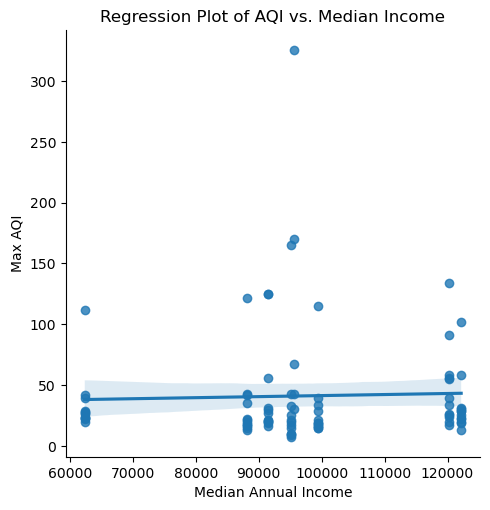

In [20]:
import seaborn as sns

# Regression plot
sns.lmplot(data= pm10_income_merged_df, x='median_income_2020', y='pm10 max')
plt.title('Regression Plot of AQI vs. Median Income')
plt.xlabel('Median Annual Income')
plt.ylabel('Max AQI')
plt.show()

/Users/celinakamler/anaconda3/envs/dev/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


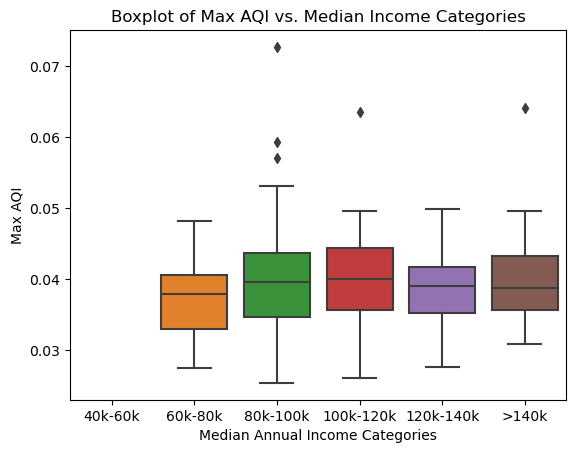

In [35]:
# Create a boxplot to look for outliers
# Create bins for median income
bins = [40000, 60000, 80000, 100000, 120000, 140000, float('inf')]
labels = ['40k-60k', '60k-80k', '80k-100k', '100k-120k', '120k-140k', '>140k']
ozone_income_merged_df['income_category'] = pd.cut(ozone_income_merged_df['median_income_2020'], bins=bins, labels=labels)

# Create the boxplot
sns.boxplot(data=ozone_income_merged_df, x='income_category', y='ozone max')
plt.title('Boxplot of Max AQI vs. Median Income Categories')
plt.xlabel('Median Annual Income Categories')
plt.ylabel('Max AQI')
plt.show()

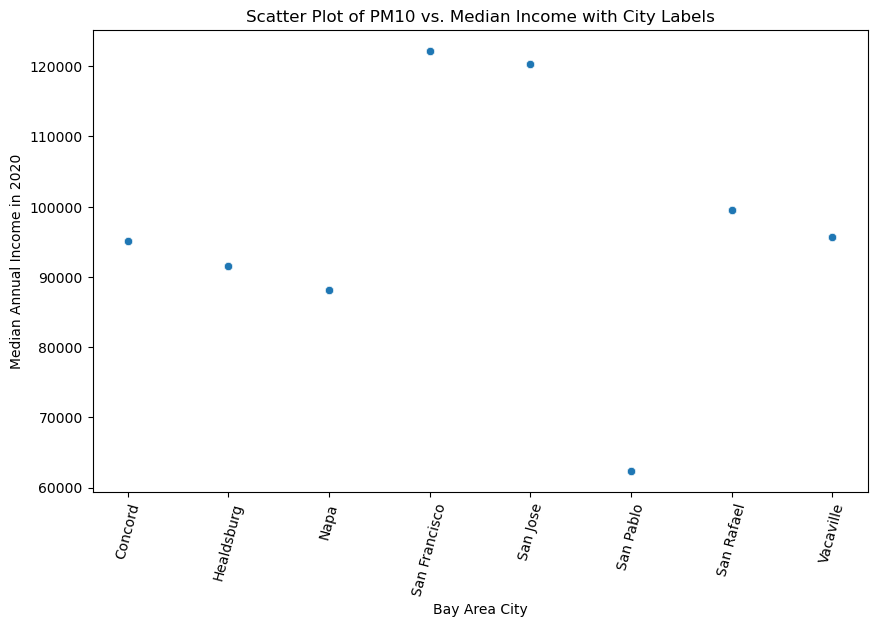

In [21]:
# Create scatter plot for PM10
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(
    data= pm10_income_merged_df, 
    x='city',
    y='median_income_2020',
    sizes=(50, 200), 
    legend=True
)

# Set plot labels and title
plt.xlabel('Bay Area City')
plt.xticks(rotation= 75)
plt.ylabel('Median Annual Income in 2020')
plt.title('Scatter Plot of PM10 vs. Median Income with City Labels')

# Show plot
plt.show()

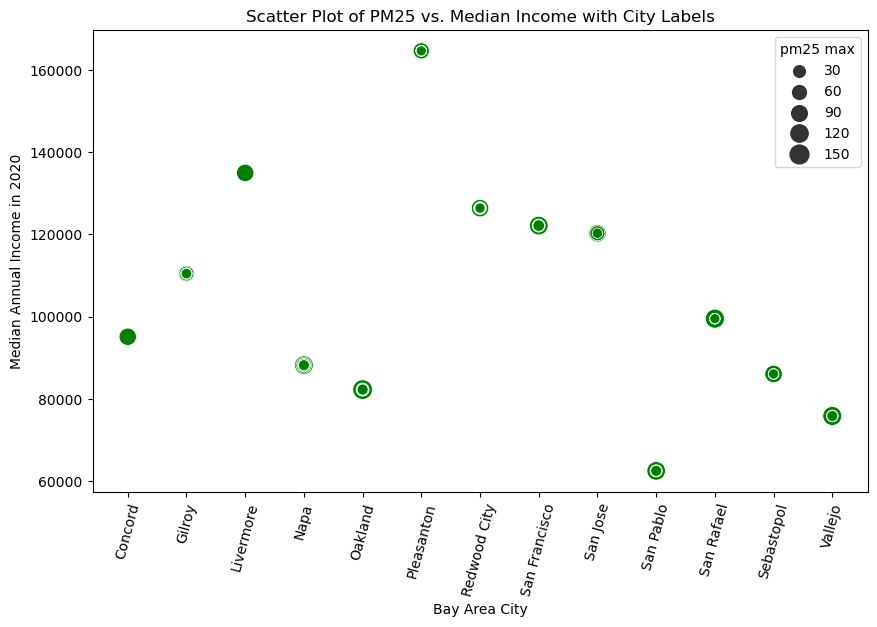

In [22]:
# Create scatter plot for PM25
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(
    data= pm25_income_merged_df, 
    x='city',
    y='median_income_2020',
    size='pm25 max',
    sizes=(50, 200), 
    legend=True,
    color= 'green'
)

# Set plot labels and title
plt.xlabel('Bay Area City')
plt.xticks(rotation= 75)
plt.ylabel('Median Annual Income in 2020')
plt.title('Scatter Plot of PM25 vs. Median Income with City Labels')

# Show plot
plt.show()

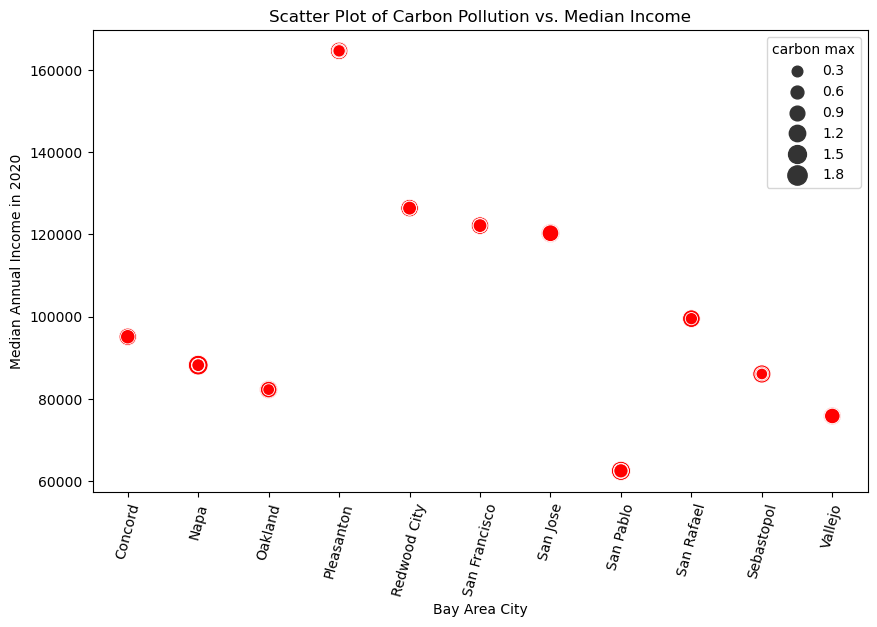

In [23]:
# Create scatter plot for carbon 
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(
    data= carbon_income_merged_df, 
    x='city',
    y='median_income_2020',
    size='carbon max', 
    sizes=(50, 200), 
    legend=True,
    color='red'
)

# Set plot labels and title
plt.xlabel('Bay Area City')
plt.xticks(rotation= 75)
plt.ylabel('Median Annual Income in 2020')
plt.title('Scatter Plot of Carbon Pollution vs. Median Income')

# Show plot
plt.show()

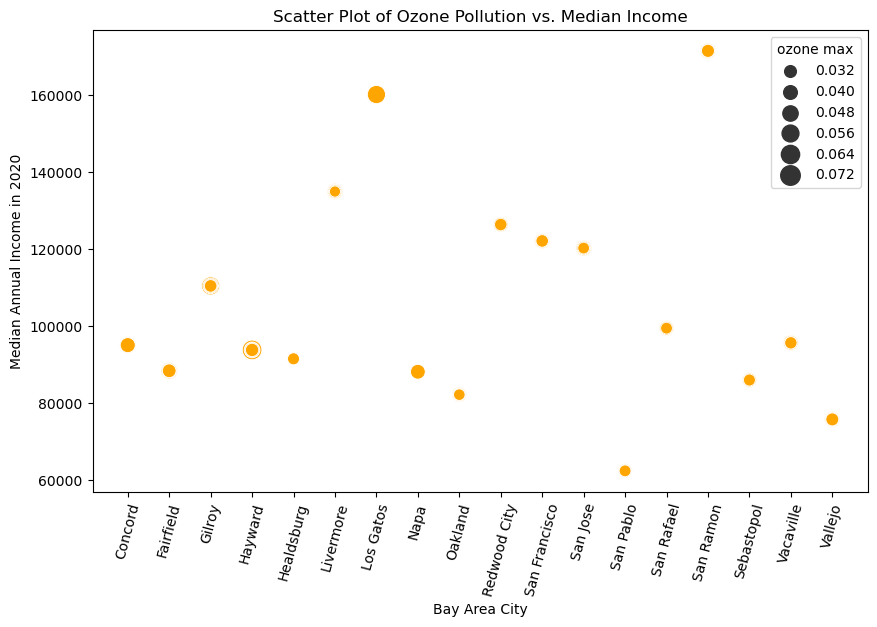

In [24]:
# Create scatter plot for ozone 
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(
    data= ozone_income_merged_df, 
    x='city',
    y='median_income_2020',
    size='ozone max', 
    sizes=(50, 200), 
    legend=True,
    color='orange'
)

# Set plot labels and title
plt.xlabel('Bay Area City')
plt.xticks(rotation= 75)
plt.ylabel('Median Annual Income in 2020')
plt.title('Scatter Plot of Ozone Pollution vs. Median Income')

# Show plot
plt.show()

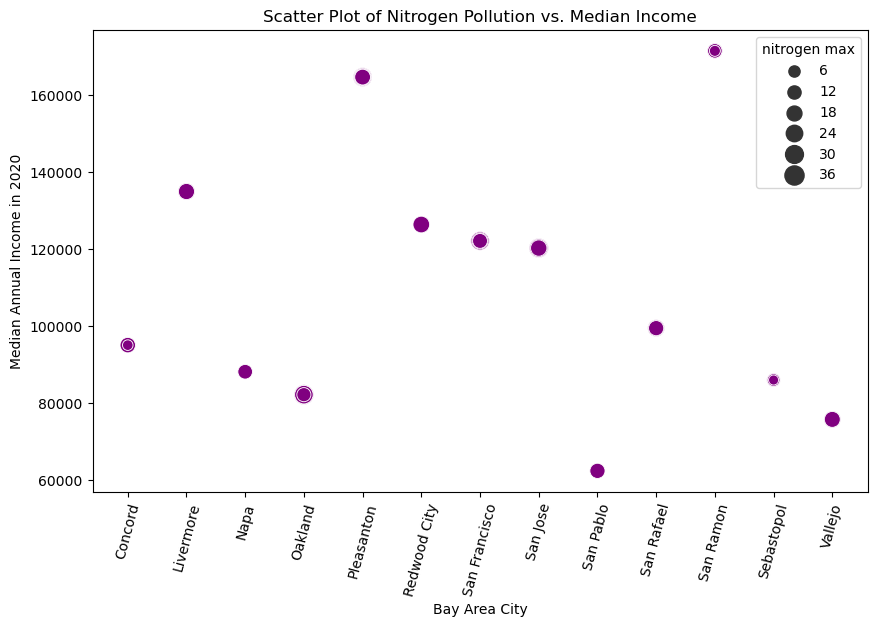

In [25]:
# Create scatter plot for nitrogen 
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(
    data= nitrogen_income_merged_df, 
    x='city',
    y='median_income_2020',
    size='nitrogen max', 
    sizes=(50, 200), 
    legend=True,
    color='purple'
)

# Set plot labels and title
plt.xlabel('Bay Area City')
plt.xticks(rotation= 75)
plt.ylabel('Median Annual Income in 2020')
plt.title('Scatter Plot of Nitrogen Pollution vs. Median Income')

# Show plot
plt.show()

/Users/celinakamler/anaconda3/envs/dev/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


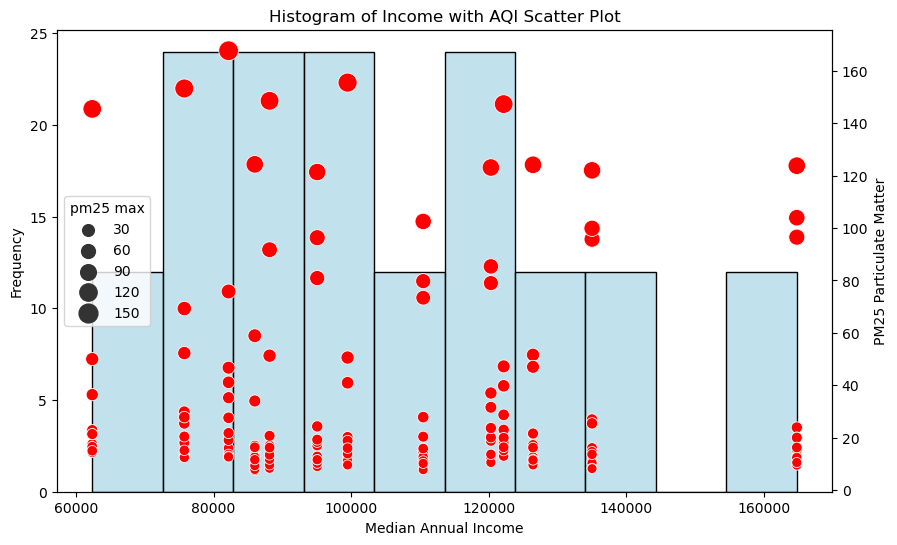

In [26]:
#Scatterplot of AQI over histogram if income

# Replace infinite values with NaN
pm25_income_merged_df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with NaN values in 'pm10' and 'median_income'
pm25_income_merged_df.dropna(subset=['pm25 max', 'median_income_2020'], inplace=True)

# Create figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot histogram of median income
sns.histplot(pm25_income_merged_df['median_income_2020'], bins=10, color='lightblue', kde=False)
ax1.set_xlabel('Median Annual Income')
ax1.set_ylabel('Frequency')
ax1.set_title('Histogram of Income with AQI Scatter Plot')

# Create a secondary y-axis to overlay the scatter plot
ax2 = ax1.twinx()

# Plot scatter plot of AQI with city labels
scatter = sns.scatterplot(
    data= pm25_income_merged_df, 
    x='median_income_2020', 
    y='pm25 max', 
    size='pm25 max',
    sizes=(50, 200), 
    legend=True, 
    ax=ax2,
    color='red'
)

# # Add city labels to the scatter plot
# for i in range(pm25_income_merged_df.shape[0]):
#     ax2.text(
#         pm25_income_merged_df['2020median_income'][i], 
#         pm25_income_merged_df['pm25 median'][i], 
#         pm25_income_merged_df['city'][i],
#         fontsize=12, 
#         ha='right', 
#         va='bottom'
#     )

# Set the y-axis label for the scatter plot
ax2.set_ylabel('PM25 Particulate Matter')

# Show plot
plt.show()